This code defines a convolutional neural network (CNN) to classify images from the Fashion-MNIST dataset. It trains the model and saves it to a file named 'my_model.h5'. It then retrieves the filters from the first convolutional layer of the trained model and normalizes them for visualization. Finally, it plots the filters as an 8x4 grid of grayscale images.

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4356 - accuracy: 0.8485
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3078 - accuracy: 0.8922
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2741 - accuracy: 0.9034
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2506 - accuracy: 0.9119
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2339 - accuracy: 0.9168


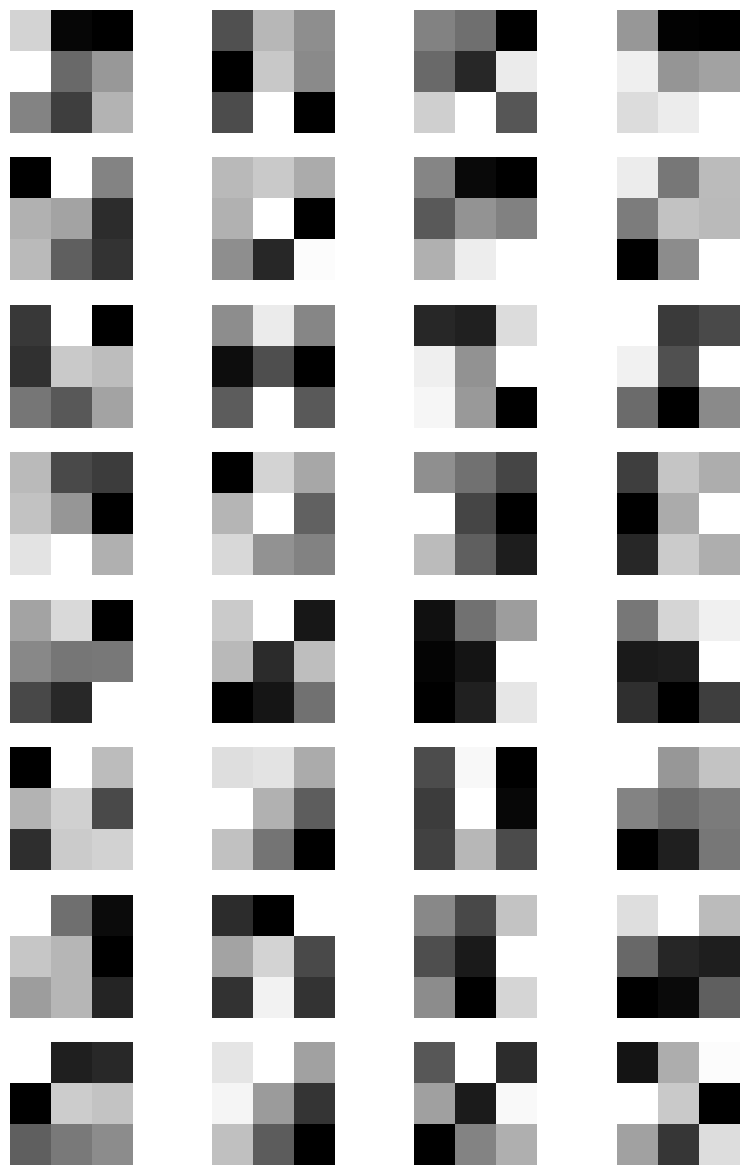

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion-MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape the data to add the channel dimension (1 for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Save the model with the name 'my_model.h5'
model.save('my_model.h5')

# Get the filters of the first convolutional layer
filters, _ = model.layers[0].get_weights()

# Normalize the filters between 0 and 1 for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters as 8x4 grid
fig, axes = plt.subplots(8, 4, figsize=(10, 15))
for i, ax in enumerate(axes.flat):
    if i < filters.shape[3]:
        img = filters[:, :, 0, i]
        ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()


This code loads the Fashion-MNIST dataset using TensorFlow and selects an image from the dataset. It then loads a pre-trained model, defines a new model that outputs the activations of each layer, and predicts the label of the selected image using the pre-trained model. Finally, it plots the selected image and the activations of each layer. The model summary is also printed.

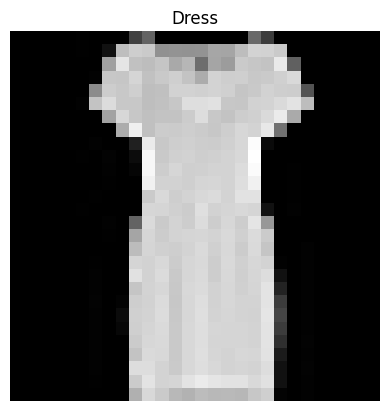

1/1 [==============================] - 0s 106ms/step


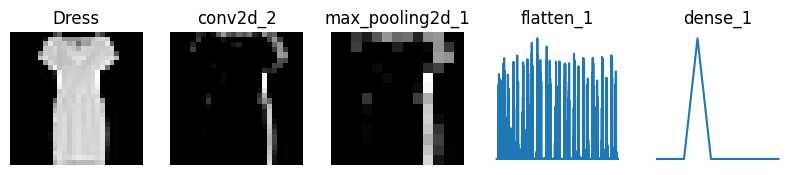

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion-MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select an image from the dataset
image_index = 20
selected_image = x_train[image_index]
selected_label = y_train[image_index]

# Plot the selected image
plt.imshow(selected_image, cmap='gray')
plt.title(class_names[selected_label])
plt.axis('off')
plt.show()

# Reshape the selected image to add the channel dimension
selected_image = selected_image.reshape(1, 28, 28, 1)

# Load the trained model
model = tf.keras.models.load_model('my_model.h5')

# Define a list to store the output of each layer
layer_outputs = [layer.output for layer in model.layers]

# Create a new model that outputs the activations of each layer
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Predict the label of the selected image using the trained model
predictions = model.predict(selected_image)

# Get the activations of each layer for the selected image
activations = activation_model.predict(selected_image)

# Plot the selected image and the activations of each layer
plt.figure(figsize=(10, 10))

# Plot the selected image
plt.subplot(5, 5, 1)
plt.imshow(selected_image.reshape(28, 28), cmap='gray')
plt.title(class_names[selected_label])
plt.axis('off')

# Plot the activations of each layer
for i in range(len(activations)):
    plt.subplot(5, 5, i+2)
    plt.title(model.layers[i].name)
    plt.axis('off')
    if len(activations[i].shape) == 4:
        plt.imshow(activations[i][0, :, :, 0], cmap='gray')
    else:
        plt.plot(activations[i][0])
plt.show()
# Print the summary of the model
model.summary()
